# Figure Generation


Processing: 2D_losses_1_256_256_256.txt


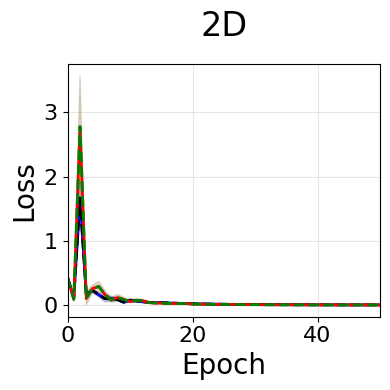


Processing: 5D_losses_1_256_256_256.txt


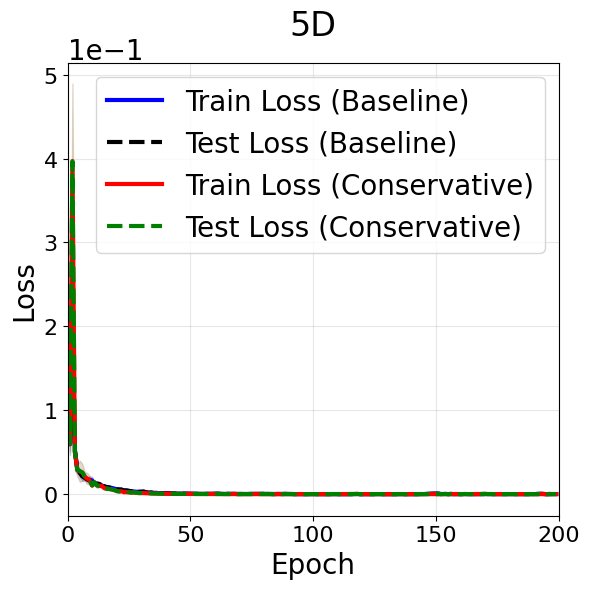

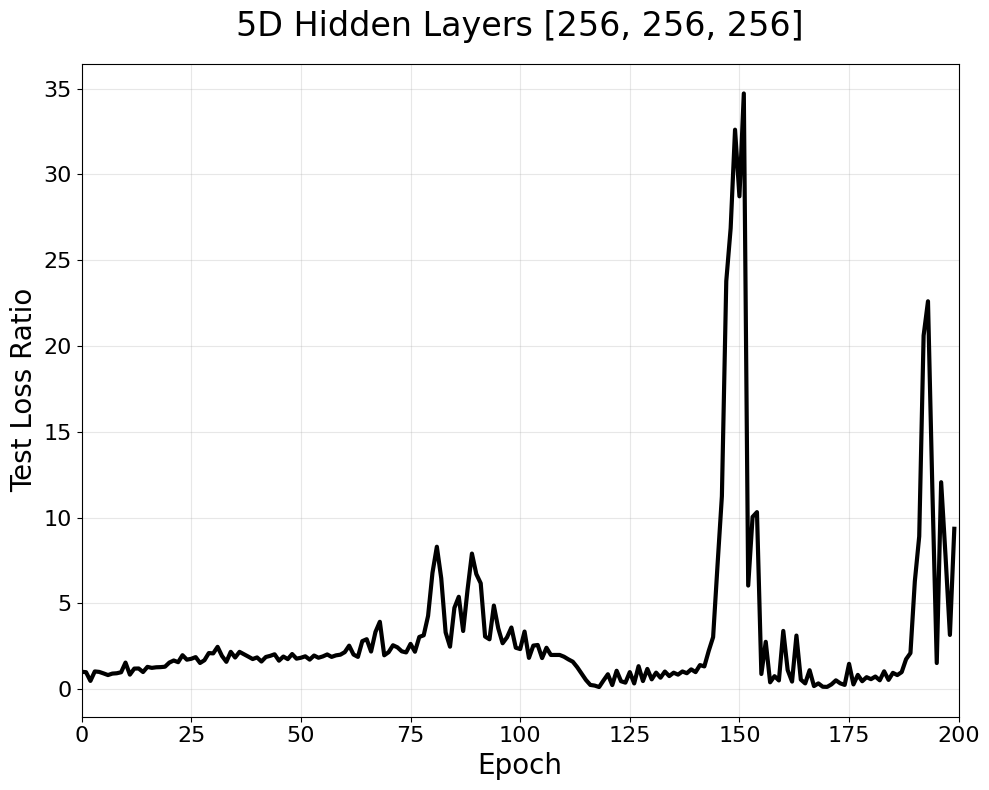

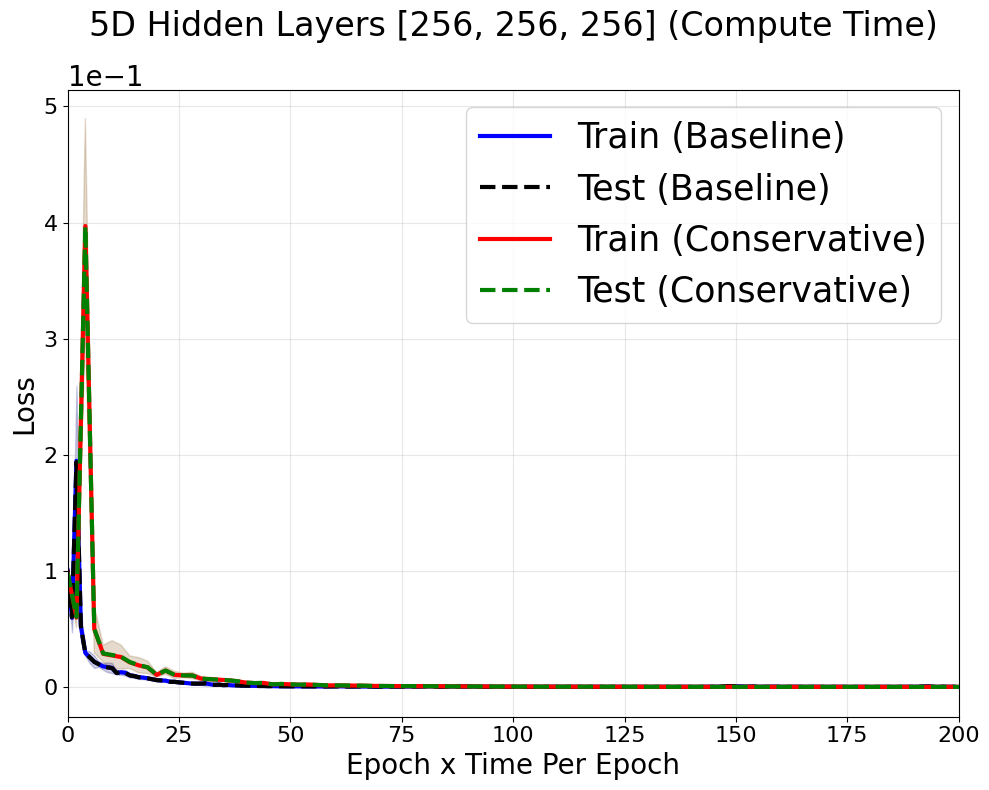


Processing: 8D_losses_1_256_256_256.txt


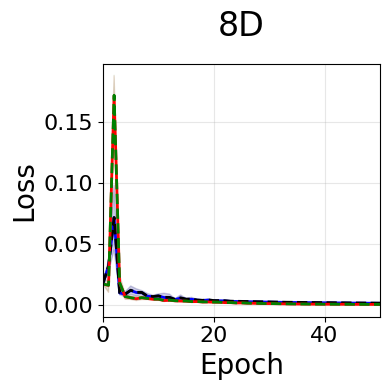


Processing: 12D_losses_1_256_256_256.txt


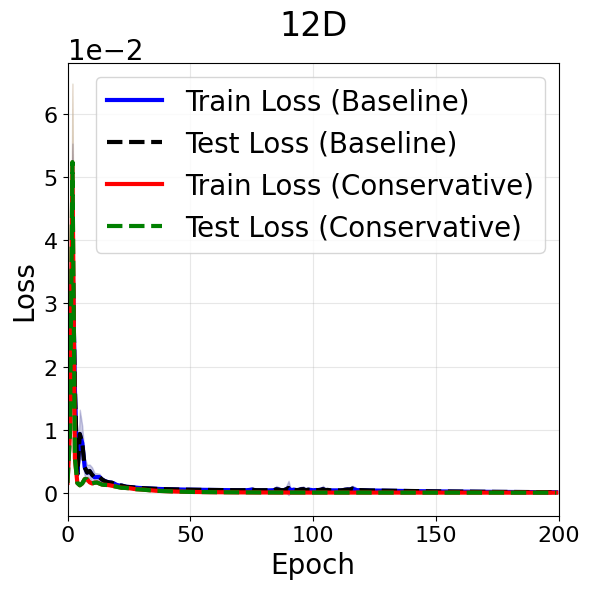

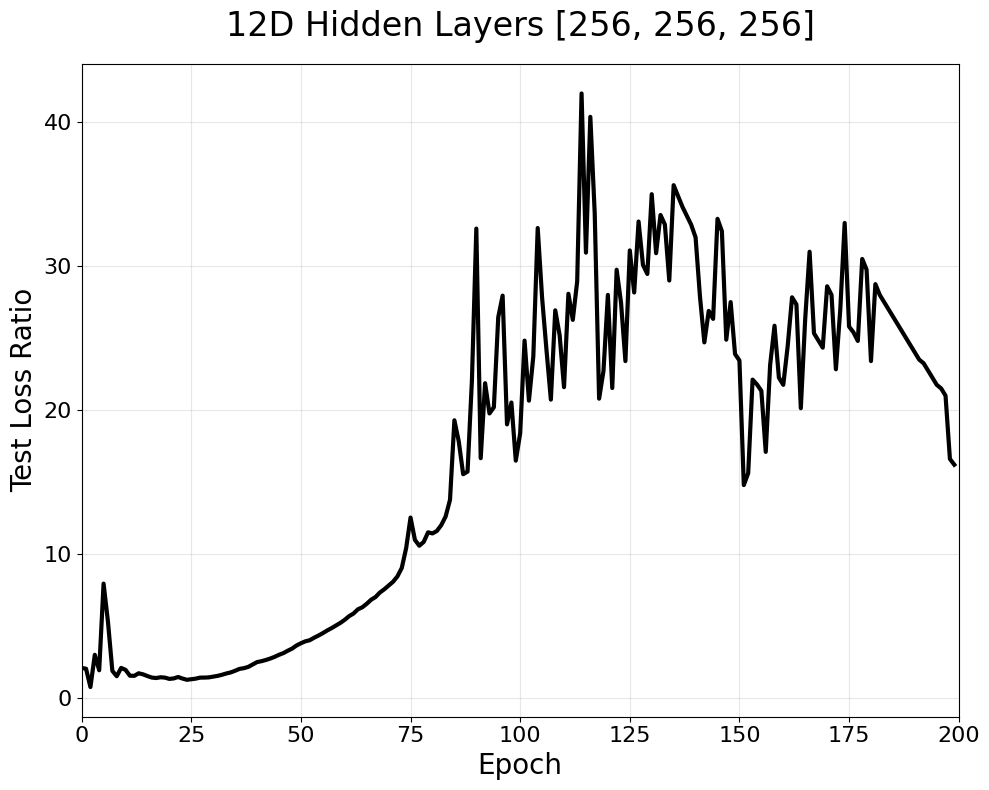

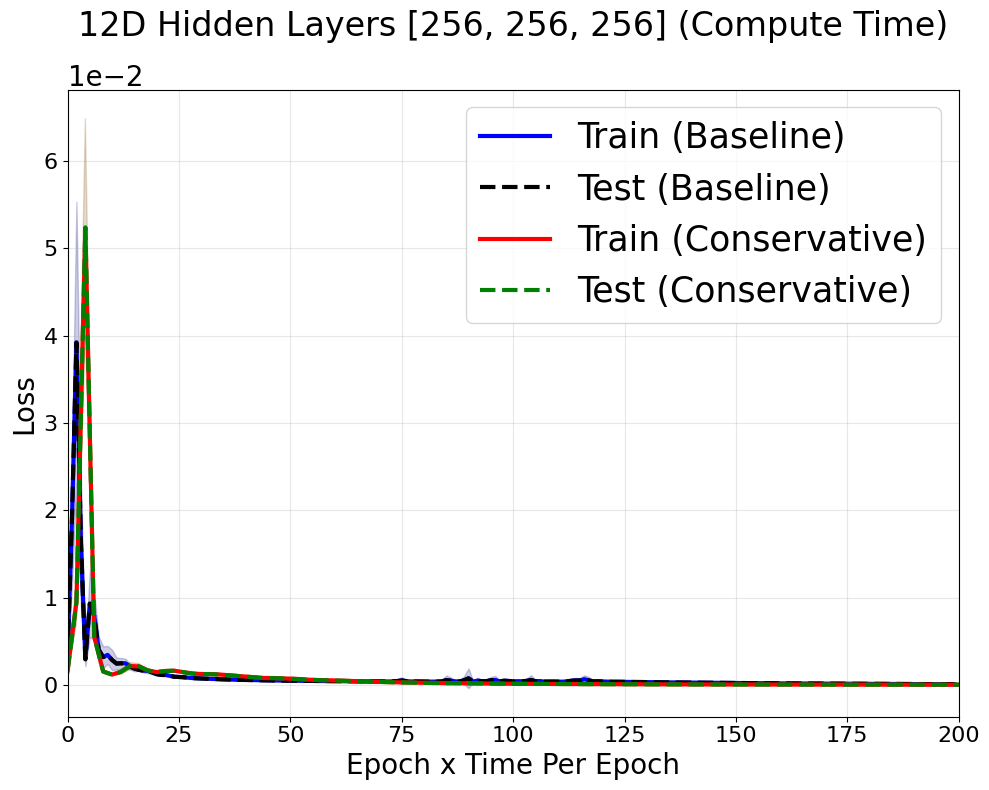


Processing: 20D_losses_1_256_256_256.txt


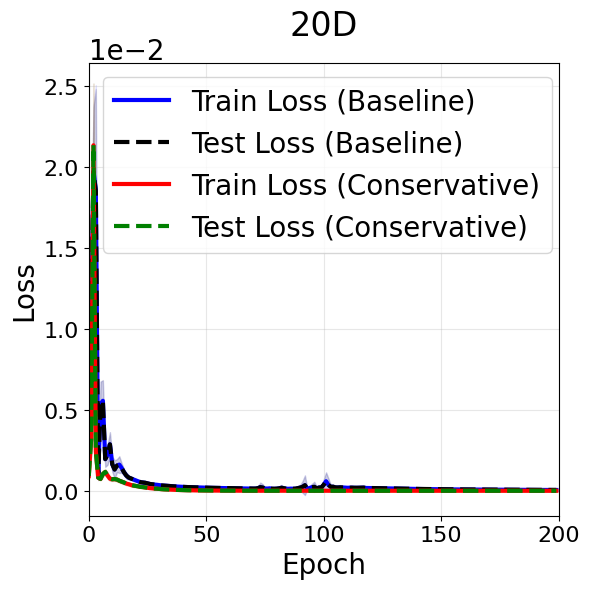

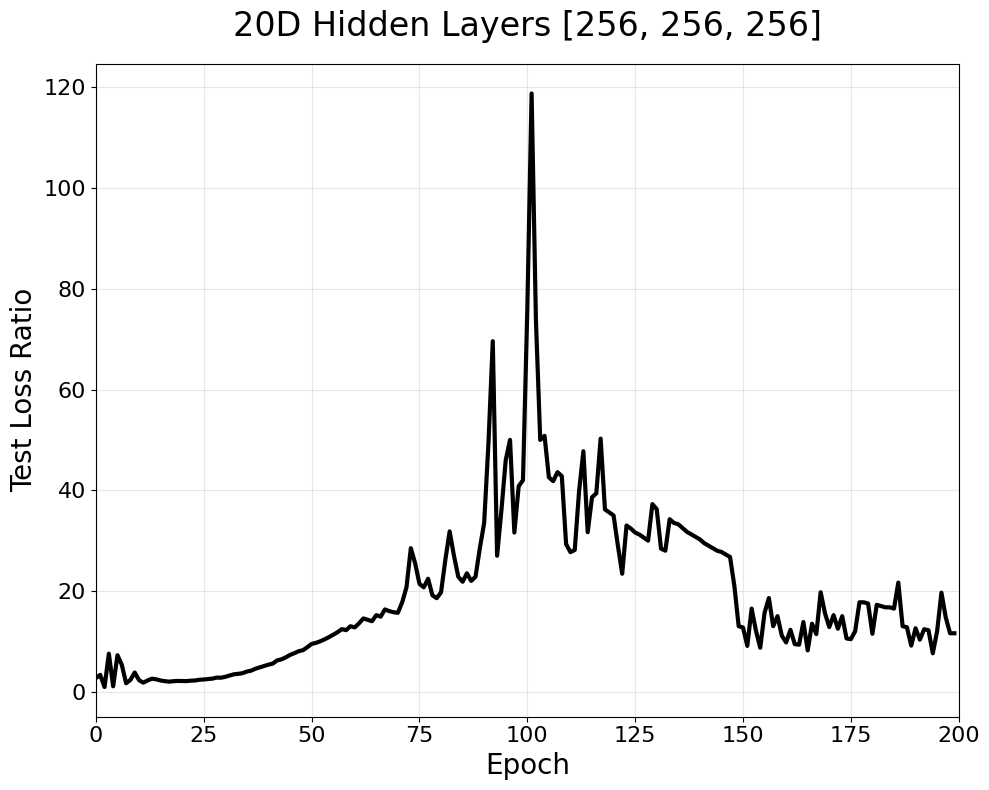

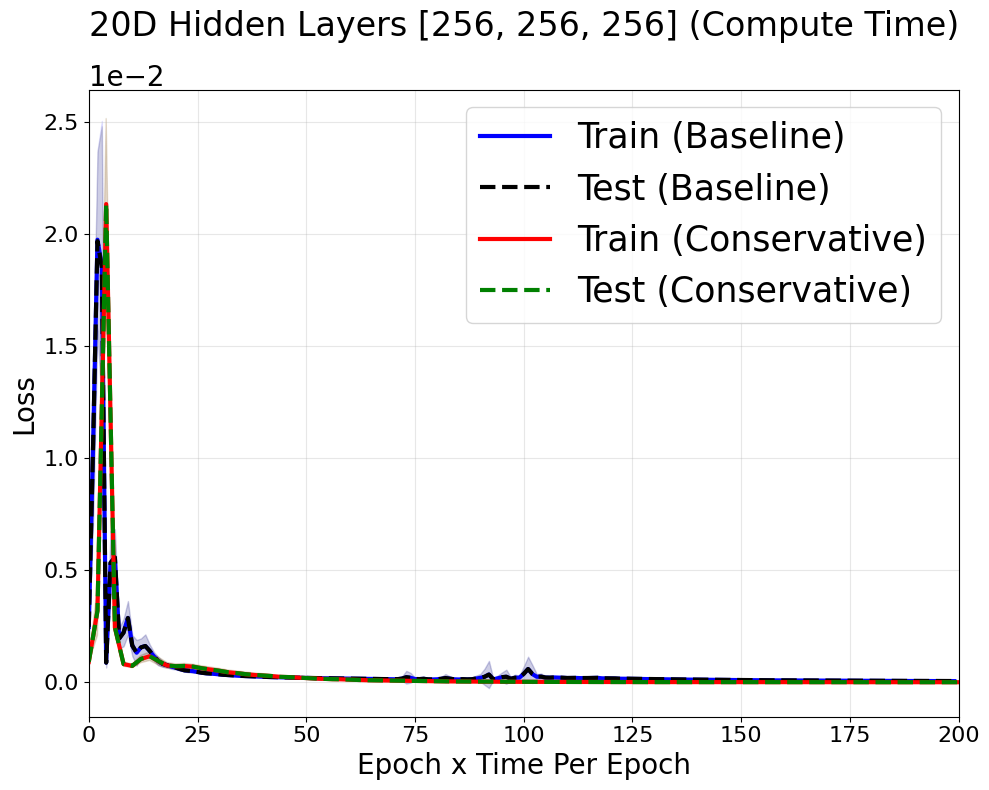

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

def read_losses(file_path):
    """Reads the loss data from a file and returns it in a structured dictionary."""
    data = np.loadtxt(file_path, skiprows=1)
    
    results = {
        'epochs': data[:, 0],
        'mean_loss': data[:, 1],
        'std_loss': data[:, 2],
        'mean_test_loss': data[:, 3],
        'std_test_loss': data[:, 4],
        'mean_loss_grad': data[:, 5],
        'std_loss_grad': data[:, 6],
        'mean_test_loss_grad': data[:, 7],
        'std_test_loss_grad': data[:, 8],
    }
    return results

# Define the dimensions and neurons to process
dimensions = ["2D", "5D", "8D", "12D", "20D"]
neurons = [256, 256, 256]  # Fixed for all files
neuron_str = "_256_256_256"
lw1 = 2  # Global line width parameter
lw2 = 3

os.makedirs("figs", exist_ok=True)

# Directory containing the experiment files
experiments_dir = Path("experiment_data")
for dim in dimensions:
    # Find all files for the current dimension (e.g., "2D_losses_*_64_64.txt")
    matching_files = list(experiments_dir.glob(f"{dim}_losses_1{neuron_str}.txt"))
    #print (f"{dim}_losses_1_64_64.txt")
    #print (matching_files)
    
    if not matching_files:
        print(f"\nNo files found for dimension: {dim}")
        continue

    for file_path in matching_files:
        # Extract dataset number (e.g., "2D_losses_1_64_64.txt" -> dataset_number=1)
        dataset_number = file_path.stem.split('_')[2]
        
        print(f"\nProcessing: {file_path.name}")
        results = read_losses(file_path)

        epochs = results['epochs']
        mean_loss = results['mean_loss']
        std_loss = results['std_loss']
        mean_test_loss = results['mean_test_loss']
        std_test_loss = results['std_test_loss']
        mean_loss_grad = results['mean_loss_grad']
        std_loss_grad = results['std_loss_grad']
        mean_test_loss_grad = results['mean_test_loss_grad']
        std_test_loss_grad = results['std_test_loss_grad']
        
        # === Custom Plotting Adjustments per Dimension ===
        if dim == "2D" or dim == "8D":
            plt.figure(figsize=(4, 4))
        
            # === Baseline NN ===
            plt.plot(epochs, mean_loss, label="Train (Baseline)", color="blue", linestyle="-", lw=lw1)
            plt.fill_between(epochs, mean_loss - std_loss, mean_loss + std_loss, color="blue", alpha=0.1)
            plt.plot(epochs, mean_test_loss, label="Test (Baseline)", color="black", linestyle="--", lw=lw1)
            plt.fill_between(epochs, mean_test_loss - std_test_loss, mean_test_loss + std_test_loss, color="black", alpha=0.1)
            
            # === Conservative NN ===
            plt.plot(epochs, mean_loss_grad, label="Train (Conservative)", color="red", linestyle="-", lw=lw1)
            plt.fill_between(epochs, mean_loss_grad - std_loss_grad, mean_loss_grad + std_loss_grad, color="red", alpha=0.1)
            plt.plot(epochs, mean_test_loss_grad, label="Test (Conservative)", color="green", linestyle="--", lw=lw1)
            plt.fill_between(epochs, mean_test_loss_grad - std_test_loss_grad, mean_test_loss_grad + std_test_loss_grad, color="green", alpha=0.1)
            
            # === Formatting ===
            plt.xlabel("Epoch", fontsize=20)
            plt.ylabel("Loss", fontsize=20)
            plt.title(dim, fontsize=24, pad=20)
            plt.xlim([0, 50])
            plt.grid(True, alpha=0.3)
            
            # Adjust tick label size
            plt.tick_params(axis='both', which='major', labelsize=16)
            plt.tick_params(axis='both', which='minor', labelsize=12)
            
            plt.tight_layout()
    
            # Save figure
            plt.savefig(f"figs/{dim}{neuron_str}.png", bbox_inches="tight")
            plt.show()
            plt.close()  # Close the figure to free memory
        
        if dim == "5D" or dim == "12D" or dim == "20D":
            #plt.figure(figsize=(20, 8))

            fig, ax = plt.subplots(figsize=(6, 6))
            
            ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
        
            # === Baseline NN ===
            plt.plot(epochs, mean_loss, label="Train Loss (Baseline)", color="blue", linestyle="-", lw=lw2)
            plt.fill_between(epochs, mean_loss - std_loss, mean_loss + std_loss, color="blue", alpha=0.1)
            plt.plot(epochs, mean_test_loss, label="Test Loss (Baseline)", color="black", linestyle="--", lw=lw2)
            plt.fill_between(epochs, mean_test_loss - std_test_loss, mean_test_loss + std_test_loss, color="black", alpha=0.1)
            
            # === Conservative NN ===
            plt.plot(epochs, mean_loss_grad, label="Train Loss (Conservative)", color="red", linestyle="-", lw=lw2)
            plt.fill_between(epochs, mean_loss_grad - std_loss_grad, mean_loss_grad + std_loss_grad, color="red", alpha=0.1)
            plt.plot(epochs, mean_test_loss_grad, label="Test Loss (Conservative)", color="green", linestyle="--", lw=lw2)
            plt.fill_between(epochs, mean_test_loss_grad - std_test_loss_grad, mean_test_loss_grad + std_test_loss_grad, color="green", alpha=0.1)
            
            # === Formatting ===
            plt.xlabel("Epoch", fontsize=20)
            plt.ylabel("Loss", fontsize=20)
            plt.title(dim, fontsize=24, pad=20)
            plt.xlim([0, 200])
            plt.grid(True, alpha=0.3)

            # Adjust tick label size
            plt.tick_params(axis='both', which='major', labelsize=16)
            plt.tick_params(axis='both', which='minor', labelsize=12)

            # Change the font size of the offset text
            #ax.xaxis.get_offset_text().set_fontsize(16)
            ax.yaxis.get_offset_text().set_fontsize(20)
            
            plt.tight_layout()
            plt.legend(loc='best', fontsize = 20)
            # Save figure
            plt.savefig(f"figs/{dim}{neuron_str}.png", bbox_inches="tight")
            plt.show()
            plt.close()  # Close the figure to free memory

            ## Test analysis plot

            fig, ax = plt.subplots(figsize=(10, 8))
            plt.plot(epochs, mean_test_loss/mean_test_loss_grad, label="Ratio of Losses", color="black", linestyle="-", lw=lw2)
            
            # === Formatting ===
            plt.xlabel("Epoch", fontsize=20)
            plt.ylabel("Test Loss Ratio", fontsize=20)
            plt.title(dim+" Hidden Layers "+str(neurons), fontsize=24, pad=20)
            plt.xlim([0, 200])
            plt.grid(True, alpha=0.3)

            # Adjust tick label size
            plt.tick_params(axis='both', which='major', labelsize=16)
            plt.tick_params(axis='both', which='minor', labelsize=12)

            plt.tight_layout()
            # Save figure
            plt.savefig(f"figs/{dim}_loss_ratio{neuron_str}.png", bbox_inches="tight")
            plt.show()
            plt.close()  # Close the figure to free memory

            ## Compute time comparison
            fig, ax = plt.subplots(figsize=(10, 8))
            
            ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
        
            # === Baseline NN ===
            plt.plot(epochs, mean_loss, label="Train (Baseline)", color="blue", linestyle="-", lw=lw2)
            plt.fill_between(epochs, mean_loss - std_loss, mean_loss + std_loss, color="blue", alpha=0.1)
            plt.plot(epochs, mean_test_loss, label="Test (Baseline)", color="black", linestyle="--", lw=lw2)
            plt.fill_between(epochs, mean_test_loss - std_test_loss, mean_test_loss + std_test_loss, color="black", alpha=0.1)
            
            # === Conservative NN ===
            plt.plot(epochs*2, mean_loss_grad, label="Train (Conservative)", color="red", linestyle="-", lw=lw2)
            plt.fill_between(epochs*2, mean_loss_grad - std_loss_grad, mean_loss_grad + std_loss_grad, color="red", alpha=0.1)
            plt.plot(epochs*2, mean_test_loss_grad, label="Test (Conservative)", color="green", linestyle="--", lw=lw2)
            plt.fill_between(epochs*2, mean_test_loss_grad - std_test_loss_grad, mean_test_loss_grad + std_test_loss_grad, color="green", alpha=0.1)
            
            # === Formatting ===
            plt.xlabel("Epoch x Time Per Epoch", fontsize=20)
            plt.ylabel("Loss", fontsize=20)
            plt.title(dim+" Hidden Layers "+str(neurons)+" (Compute Time)", fontsize=24, pad=20)
            plt.xlim([0, 200])
            plt.grid(True, alpha=0.3)

            # Adjust tick label size
            plt.tick_params(axis='both', which='major', labelsize=16)
            plt.tick_params(axis='both', which='minor', labelsize=12)

            # Change the font size of the offset text
            #ax.xaxis.get_offset_text().set_fontsize(16)
            ax.yaxis.get_offset_text().set_fontsize(20)
            
            plt.tight_layout()
            plt.legend(loc='best', fontsize = 25)
            # Save figure
            plt.savefig(f"figs/{dim}_time{neuron_str}.png", bbox_inches="tight")
            plt.show()
            plt.close()  # Close the figure to free memory


Processing: 2D_losses_1_64_64_64.txt


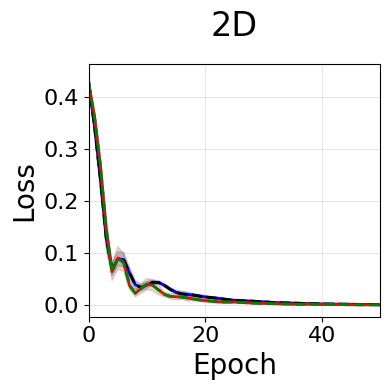


Processing: 5D_losses_1_64_64_64.txt


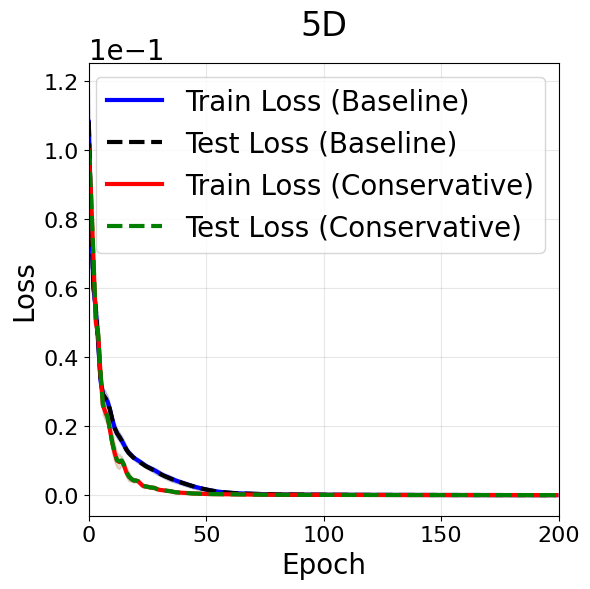

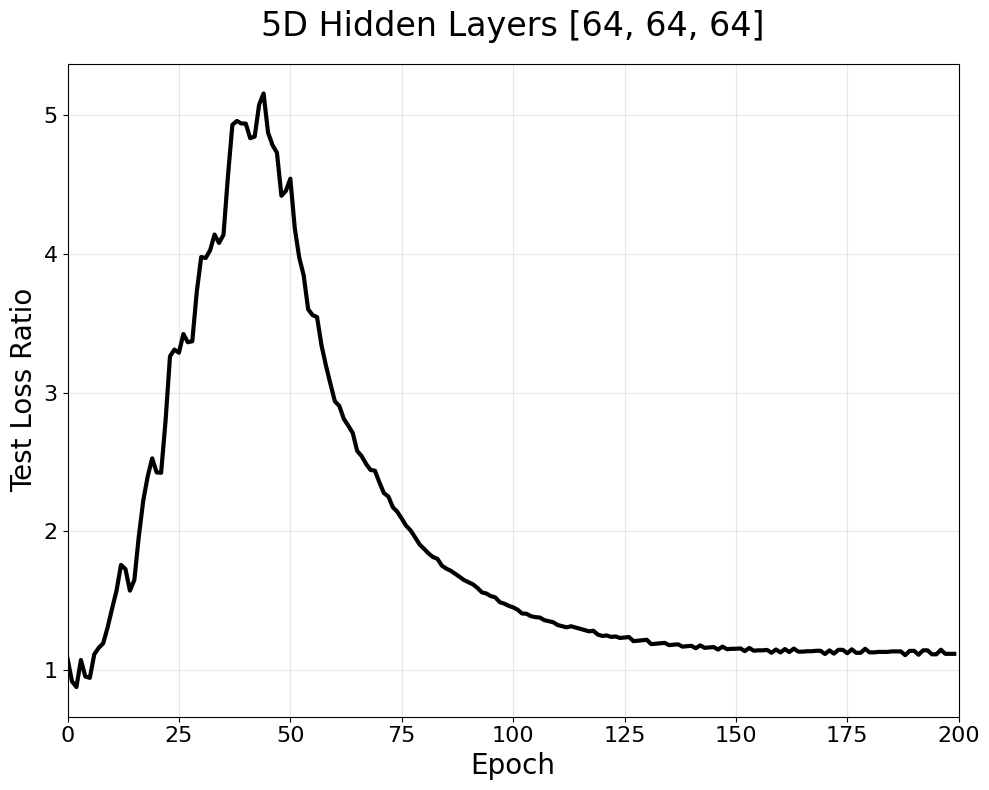

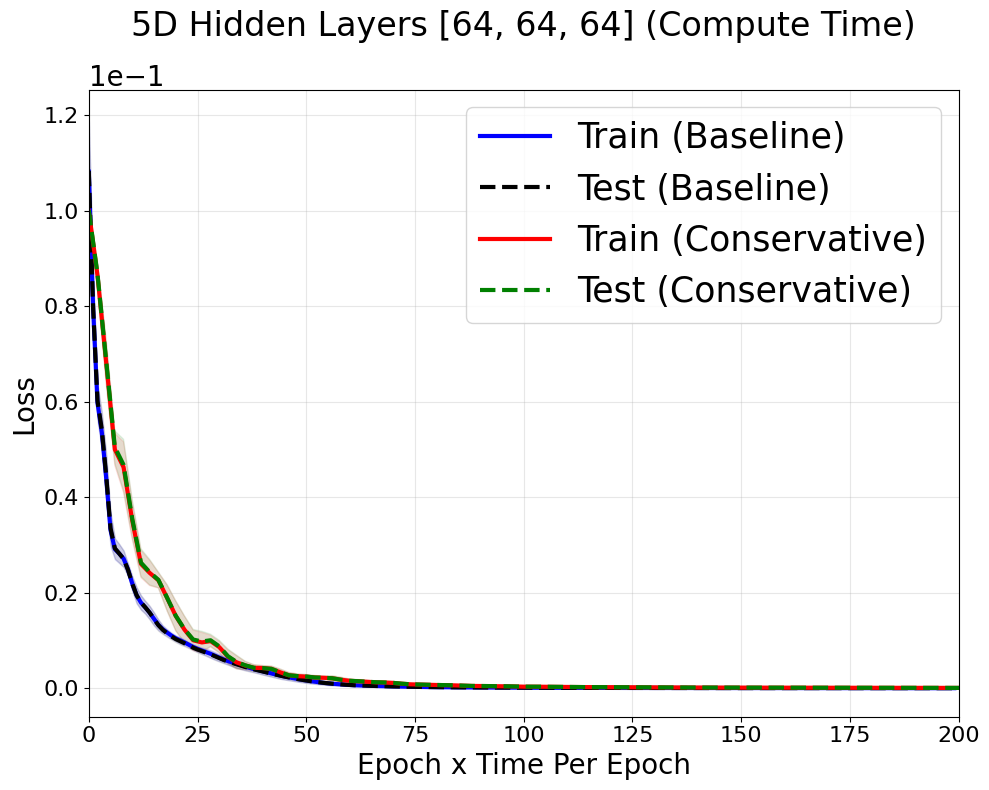


Processing: 8D_losses_1_64_64_64.txt


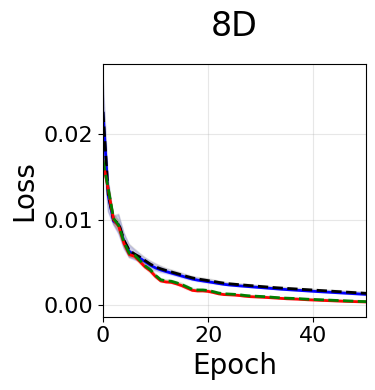


Processing: 12D_losses_1_64_64_64.txt


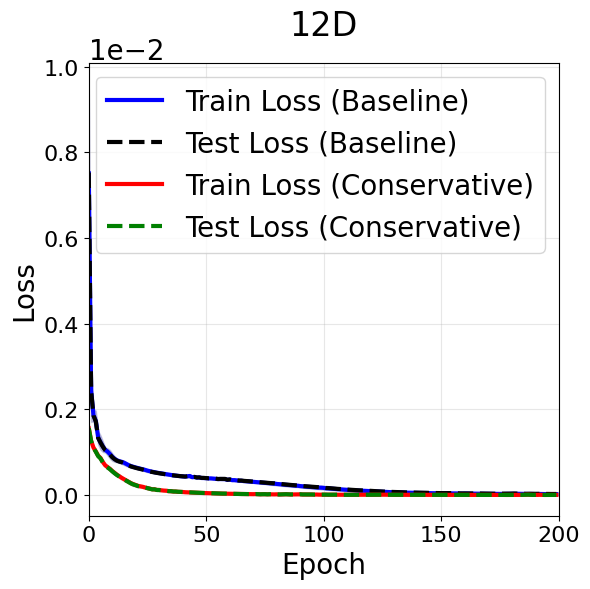

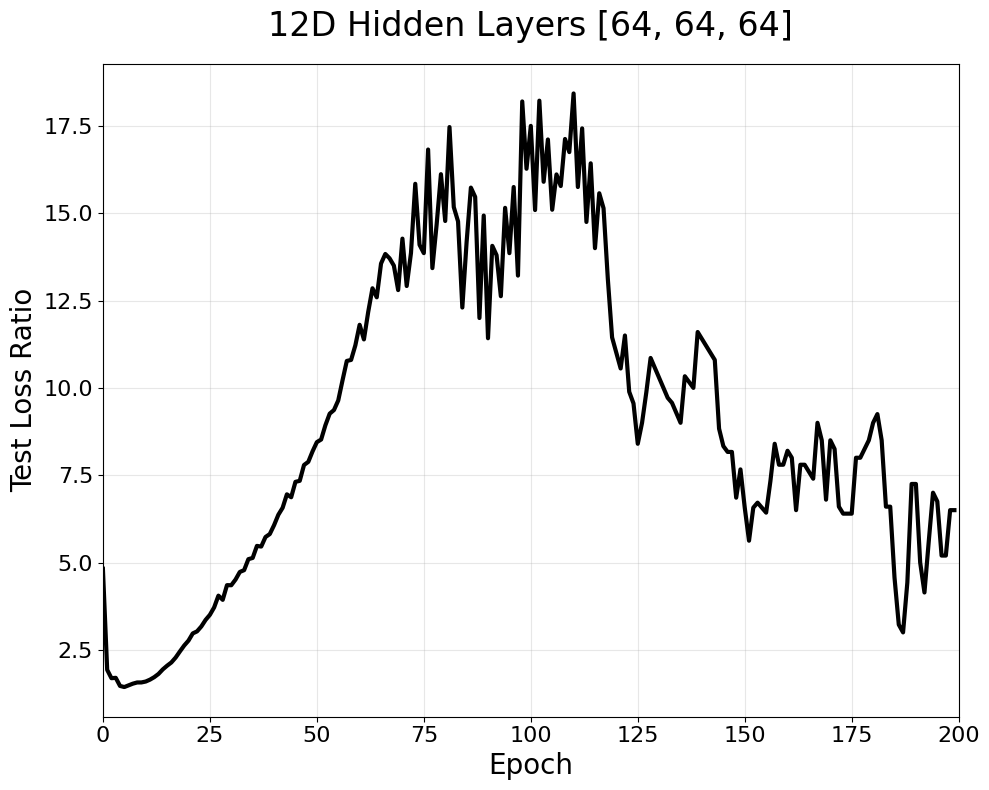

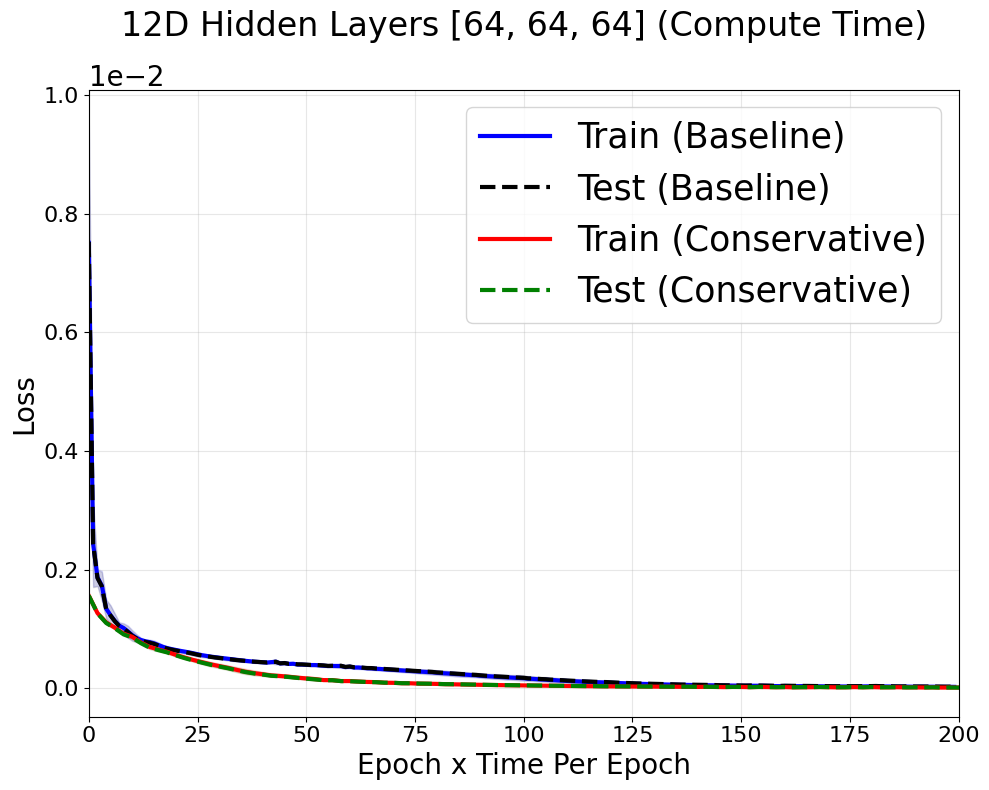


Processing: 20D_losses_1_64_64_64.txt


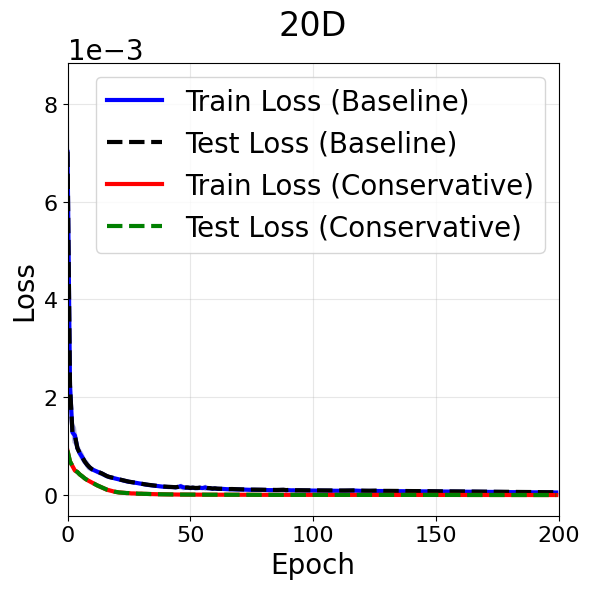

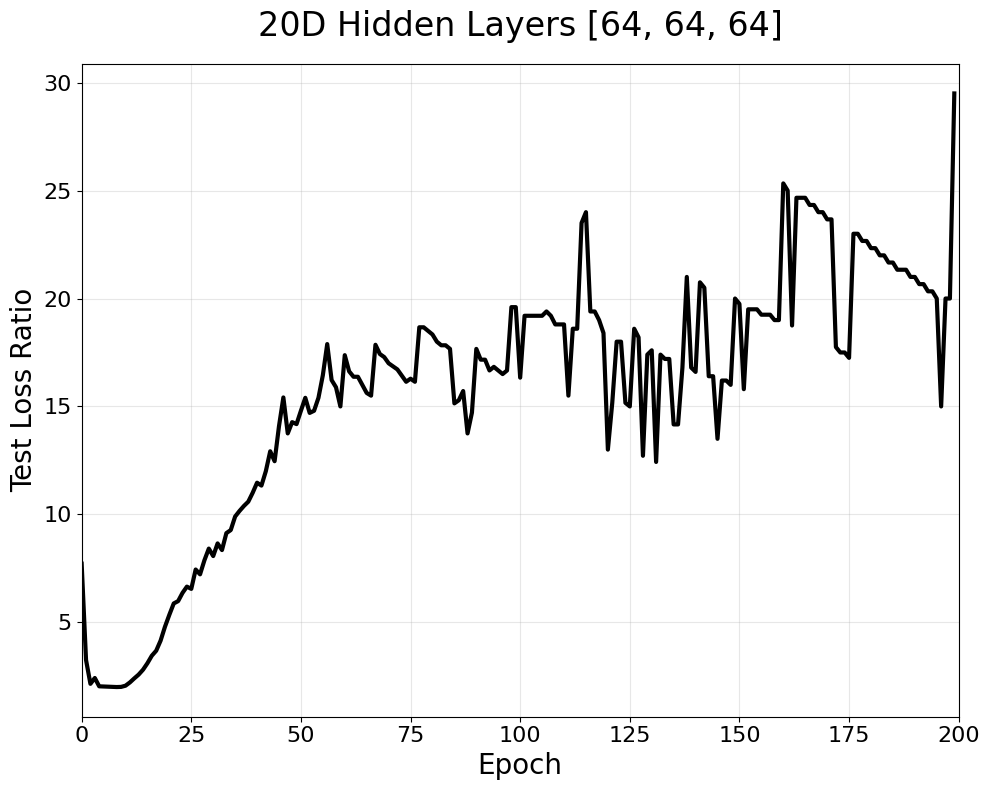

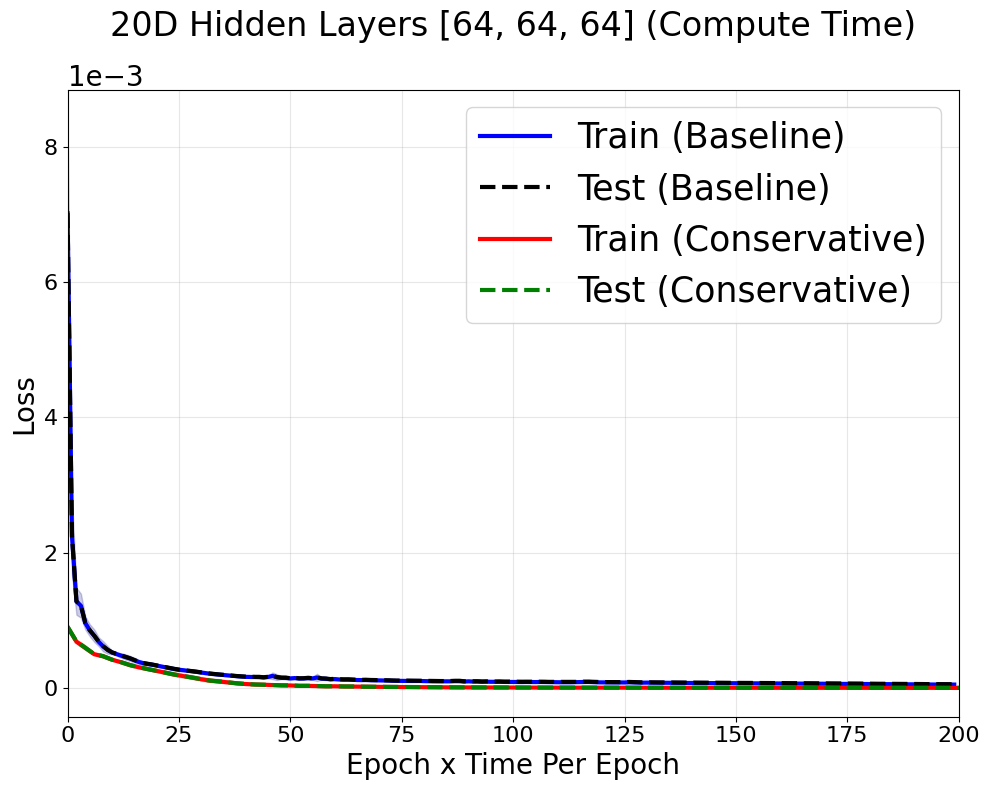

In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

def read_losses(file_path):
    """Reads the loss data from a file and returns it in a structured dictionary."""
    data = np.loadtxt(file_path, skiprows=1)
    
    results = {
        'epochs': data[:, 0],
        'mean_loss': data[:, 1],
        'std_loss': data[:, 2],
        'mean_test_loss': data[:, 3],
        'std_test_loss': data[:, 4],
        'mean_loss_grad': data[:, 5],
        'std_loss_grad': data[:, 6],
        'mean_test_loss_grad': data[:, 7],
        'std_test_loss_grad': data[:, 8],
    }
    return results

# Define the dimensions and neurons to process
dimensions = ["2D", "5D", "8D", "12D", "20D"]
neurons = [64, 64, 64]  # Fixed for all files
neuron_str = "_64_64_64"
lw1 = 2  # Global line width parameter
lw2 = 3

os.makedirs("figs", exist_ok=True)

# Directory containing the experiment files
experiments_dir = Path("experiment_data")
for dim in dimensions:
    # Find all files for the current dimension (e.g., "2D_losses_*_64_64.txt")
    matching_files = list(experiments_dir.glob(f"{dim}_losses_1{neuron_str}.txt"))
    #print (f"{dim}_losses_1_64_64.txt")
    #print (matching_files)
    
    if not matching_files:
        print(f"\nNo files found for dimension: {dim}")
        continue

    for file_path in matching_files:
        # Extract dataset number (e.g., "2D_losses_1_64_64.txt" -> dataset_number=1)
        dataset_number = file_path.stem.split('_')[2]
        
        print(f"\nProcessing: {file_path.name}")
        results = read_losses(file_path)

        epochs = results['epochs']
        mean_loss = results['mean_loss']
        std_loss = results['std_loss']
        mean_test_loss = results['mean_test_loss']
        std_test_loss = results['std_test_loss']
        mean_loss_grad = results['mean_loss_grad']
        std_loss_grad = results['std_loss_grad']
        mean_test_loss_grad = results['mean_test_loss_grad']
        std_test_loss_grad = results['std_test_loss_grad']
        
        # === Custom Plotting Adjustments per Dimension ===
        if dim == "2D" or dim == "8D":
            plt.figure(figsize=(4, 4))
        
            # === Baseline NN ===
            plt.plot(epochs, mean_loss, label="Train (Baseline)", color="blue", linestyle="-", lw=lw1)
            plt.fill_between(epochs, mean_loss - std_loss, mean_loss + std_loss, color="blue", alpha=0.1)
            plt.plot(epochs, mean_test_loss, label="Test (Baseline)", color="black", linestyle="--", lw=lw1)
            plt.fill_between(epochs, mean_test_loss - std_test_loss, mean_test_loss + std_test_loss, color="black", alpha=0.1)
            
            # === Conservative NN ===
            plt.plot(epochs, mean_loss_grad, label="Train (Conservative)", color="red", linestyle="-", lw=lw1)
            plt.fill_between(epochs, mean_loss_grad - std_loss_grad, mean_loss_grad + std_loss_grad, color="red", alpha=0.1)
            plt.plot(epochs, mean_test_loss_grad, label="Test (Conservative)", color="green", linestyle="--", lw=lw1)
            plt.fill_between(epochs, mean_test_loss_grad - std_test_loss_grad, mean_test_loss_grad + std_test_loss_grad, color="green", alpha=0.1)
            
            # === Formatting ===
            plt.xlabel("Epoch", fontsize=20)
            plt.ylabel("Loss", fontsize=20)
            plt.title(dim, fontsize=24, pad=20)
            plt.xlim([0, 50])
            plt.grid(True, alpha=0.3)
            
            # Adjust tick label size
            plt.tick_params(axis='both', which='major', labelsize=16)
            plt.tick_params(axis='both', which='minor', labelsize=12)
            
            plt.tight_layout()
    
            # Save figure
            plt.savefig(f"figs/{dim}{neuron_str}.png", bbox_inches="tight")
            plt.show()
            plt.close()  # Close the figure to free memory
        
        if dim == "5D" or dim == "12D" or dim == "20D":
            #plt.figure(figsize=(20, 8))

            fig, ax = plt.subplots(figsize=(6, 6))
            
            ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
        
            # === Baseline NN ===
            plt.plot(epochs, mean_loss, label="Train Loss (Baseline)", color="blue", linestyle="-", lw=lw2)
            plt.fill_between(epochs, mean_loss - std_loss, mean_loss + std_loss, color="blue", alpha=0.1)
            plt.plot(epochs, mean_test_loss, label="Test Loss (Baseline)", color="black", linestyle="--", lw=lw2)
            plt.fill_between(epochs, mean_test_loss - std_test_loss, mean_test_loss + std_test_loss, color="black", alpha=0.1)
            
            # === Conservative NN ===
            plt.plot(epochs, mean_loss_grad, label="Train Loss (Conservative)", color="red", linestyle="-", lw=lw2)
            plt.fill_between(epochs, mean_loss_grad - std_loss_grad, mean_loss_grad + std_loss_grad, color="red", alpha=0.1)
            plt.plot(epochs, mean_test_loss_grad, label="Test Loss (Conservative)", color="green", linestyle="--", lw=lw2)
            plt.fill_between(epochs, mean_test_loss_grad - std_test_loss_grad, mean_test_loss_grad + std_test_loss_grad, color="green", alpha=0.1)
            
            # === Formatting ===
            plt.xlabel("Epoch", fontsize=20)
            plt.ylabel("Loss", fontsize=20)
            plt.title(dim, fontsize=24, pad=20)
            plt.xlim([0, 200])
            plt.grid(True, alpha=0.3)

            # Adjust tick label size
            plt.tick_params(axis='both', which='major', labelsize=16)
            plt.tick_params(axis='both', which='minor', labelsize=12)

            # Change the font size of the offset text
            #ax.xaxis.get_offset_text().set_fontsize(16)
            ax.yaxis.get_offset_text().set_fontsize(20)
            
            plt.tight_layout()
            plt.legend(loc='best', fontsize = 20)
            # Save figure
            plt.savefig(f"figs/{dim}{neuron_str}.png", bbox_inches="tight")
            plt.show()
            plt.close()  # Close the figure to free memory

            ## Test analysis plot

            fig, ax = plt.subplots(figsize=(10, 8))
            plt.plot(epochs, mean_test_loss/mean_test_loss_grad, label="Ratio of Losses", color="black", linestyle="-", lw=lw2)
            
            # === Formatting ===
            plt.xlabel("Epoch", fontsize=20)
            plt.ylabel("Test Loss Ratio", fontsize=20)
            plt.title(dim+" Hidden Layers "+str(neurons), fontsize=24, pad=20)
            plt.xlim([0, 200])
            plt.grid(True, alpha=0.3)

            # Adjust tick label size
            plt.tick_params(axis='both', which='major', labelsize=16)
            plt.tick_params(axis='both', which='minor', labelsize=12)

            plt.tight_layout()
            # Save figure
            plt.savefig(f"figs/{dim}_loss_ratio{neuron_str}.png", bbox_inches="tight")
            plt.show()
            plt.close()  # Close the figure to free memory

            ## Compute time comparison
            fig, ax = plt.subplots(figsize=(10, 8))
            
            ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
        
            # === Baseline NN ===
            plt.plot(epochs, mean_loss, label="Train (Baseline)", color="blue", linestyle="-", lw=lw2)
            plt.fill_between(epochs, mean_loss - std_loss, mean_loss + std_loss, color="blue", alpha=0.1)
            plt.plot(epochs, mean_test_loss, label="Test (Baseline)", color="black", linestyle="--", lw=lw2)
            plt.fill_between(epochs, mean_test_loss - std_test_loss, mean_test_loss + std_test_loss, color="black", alpha=0.1)
            
            # === Conservative NN ===
            plt.plot(epochs*2, mean_loss_grad, label="Train (Conservative)", color="red", linestyle="-", lw=lw2)
            plt.fill_between(epochs*2, mean_loss_grad - std_loss_grad, mean_loss_grad + std_loss_grad, color="red", alpha=0.1)
            plt.plot(epochs*2, mean_test_loss_grad, label="Test (Conservative)", color="green", linestyle="--", lw=lw2)
            plt.fill_between(epochs*2, mean_test_loss_grad - std_test_loss_grad, mean_test_loss_grad + std_test_loss_grad, color="green", alpha=0.1)
            
            # === Formatting ===
            plt.xlabel("Epoch x Time Per Epoch", fontsize=20)
            plt.ylabel("Loss", fontsize=20)
            plt.title(dim+" Hidden Layers "+str(neurons)+" (Compute Time)", fontsize=24, pad=20)
            plt.xlim([0, 200])
            plt.grid(True, alpha=0.3)

            # Adjust tick label size
            plt.tick_params(axis='both', which='major', labelsize=16)
            plt.tick_params(axis='both', which='minor', labelsize=12)

            # Change the font size of the offset text
            #ax.xaxis.get_offset_text().set_fontsize(16)
            ax.yaxis.get_offset_text().set_fontsize(20)
            
            plt.tight_layout()
            plt.legend(loc='best', fontsize = 25)
            # Save figure
            plt.savefig(f"figs/{dim}_time{neuron_str}.png", bbox_inches="tight")
            plt.show()
            plt.close()  # Close the figure to free memory